In [18]:
# Importăm librăriile necesare
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# 1. Încărcarea dataset-ului
# Verificăm mai întâi structura dataset-ului pentru a identifica denumirile corecte ale coloanelor
df = pd.read_csv("ecommerceDataset.csv")
print("Coloanele disponibile în dataset:", df.columns)
print(df.head())

Coloanele disponibile în dataset: Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed pai

In [20]:
# 2. Redenumirea coloanelor pentru a fi mai ușor de lucrat cu ele
df.columns = ['category', 'description']

In [21]:
# 3. Tratăm valorile lipsă în coloana 'description'
df['description'].fillna('', inplace=True)

C:\Users\drago\AppData\Local\Temp\ipykernel_2696\156115875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [22]:

# 4. Separarea caracteristicilor (X) și etichetei (y)
X = df['description']
y = df['category']

In [23]:
# 5. Împărțirea datelor în seturi de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# 6. Codificarea textului folosind TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
# 7. Antrenarea și evaluarea modelelor

# Modelul 1: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [26]:
# Afișarea rezultatelor pentru Naive Bayes
print("\nRezultatele pentru Multinomial Naive Bayes:")
print(f"Acurație: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Rezultatele pentru Multinomial Naive Bayes:
Acurație: 0.95
Classification Report:
                         precision    recall  f1-score   support

                 Books       0.97      0.92      0.95      2379
Clothing & Accessories       0.98      0.95      0.96      1750
           Electronics       0.97      0.91      0.94      2082
             Household       0.91      0.98      0.95      3874

              accuracy                           0.95     10085
             macro avg       0.96      0.94      0.95     10085
          weighted avg       0.95      0.95      0.95     10085



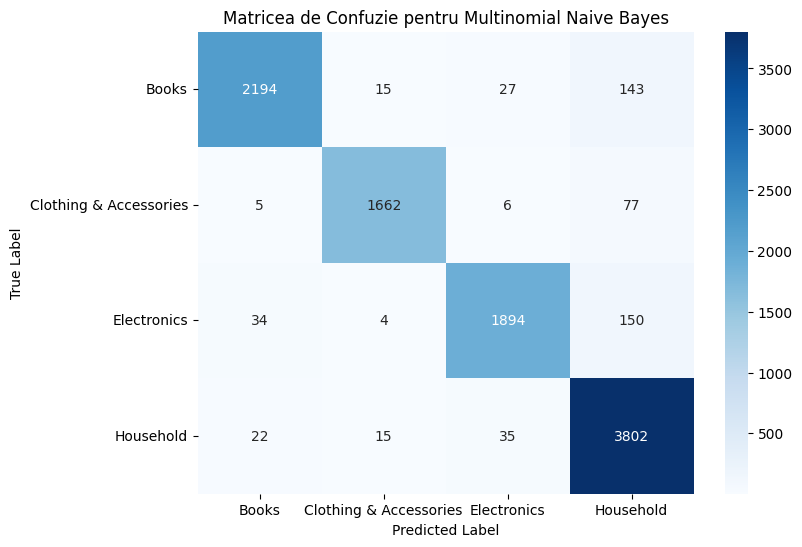

In [27]:
# Matricea de confuzie pentru Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Matricea de Confuzie pentru Multinomial Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
# Modelul 2: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)

In [29]:
# Afișarea rezultatelor pentru Decision Tree
print("\nRezultatele pentru Decision Tree Classifier:")
print(f"Acurație: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Rezultatele pentru Decision Tree Classifier:
Acurație: 0.95
Classification Report:
                         precision    recall  f1-score   support

                 Books       0.96      0.96      0.96      2379
Clothing & Accessories       0.96      0.95      0.95      1750
           Electronics       0.94      0.93      0.94      2082
             Household       0.94      0.96      0.95      3874

              accuracy                           0.95     10085
             macro avg       0.95      0.95      0.95     10085
          weighted avg       0.95      0.95      0.95     10085



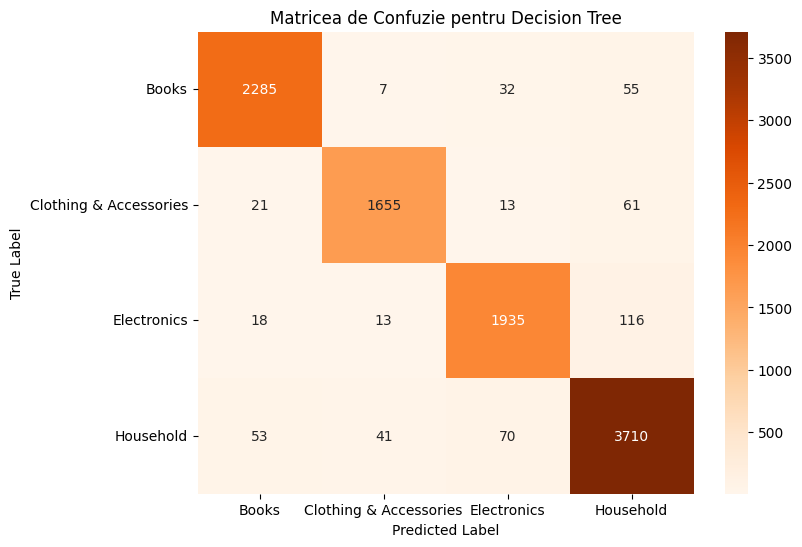

In [30]:
# Matricea de confuzie pentru Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Matricea de Confuzie pentru Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# Compararea performanțelor
print("\nComparația performanțelor între cele două modele:")
print(f"Acurația Multinomial Naive Bayes: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Acurația Decision Tree Classifier: {accuracy_score(y_test, y_pred_dt):.2f}")


Comparația performanțelor între cele două modele:
Acurația Multinomial Naive Bayes: 0.95
Acurația Decision Tree Classifier: 0.95
